In [43]:
#Pratham Shah

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
import pandas as pd
df=pd.read_csv('../data/raw/amazon 2.csv')

# Your Name Here


## Research question/interests


**1. Predicting trends in Customer behaviour(Number of Ratings) with respect to the discount price and taking in context the ratings of the product** 
By this I want to explore the relationship between product discounts and their effect on ratings. Further I want to evaluate the trends in rating with respect to the price and category of the product, namely (Computers and Accessories and Electronics and wearables). 

**2. Trends between the discounted percentage and the actual price of the product**
By this I want to explore the trends of how the price of the product affects the discount percentage of the product. 

**3. Price segment and ratings** 
By this I want to divide the data set into various price segement and see which particular price segment has maximum ratings and reviews, signifying higher sales of that particular price segment.

**4. For a particular category and it's description (eg Computer and accessories) what prices have similar product description and how does it affect the ratings and reviews of the products**


In [50]:
df.head()
df.shape
df.columns
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [7]:
df.isnull().sum() #Null values in the data set

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [8]:
print(df.dtypes)

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [9]:
df = df.dropna() #Dropping the null values


In [10]:
df.info() #Printing the refined values after cleaning


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1463 non-null   object
 1   product_name         1463 non-null   object
 2   category             1463 non-null   object
 3   discounted_price     1463 non-null   object
 4   actual_price         1463 non-null   object
 5   discount_percentage  1463 non-null   object
 6   rating               1463 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1463 non-null   object
 9   user_id              1463 non-null   object
 10  user_name            1463 non-null   object
 11  review_id            1463 non-null   object
 12  review_title         1463 non-null   object
 13  review_content       1463 non-null   object
 14  img_link             1463 non-null   object
 15  product_link         1463 non-null   object
dtypes: obj

In [51]:
#The following gives the basic informatio about the data set  allowing us to identify any null values in the dataset. We can see that there are missing values in the rating, rating_count, and about_product columns.
df['discounted_price'] = df['discounted_price'].astype(float)
df.info()

ValueError: could not convert string to float: '₹399'

<AxesSubplot:ylabel='category'>

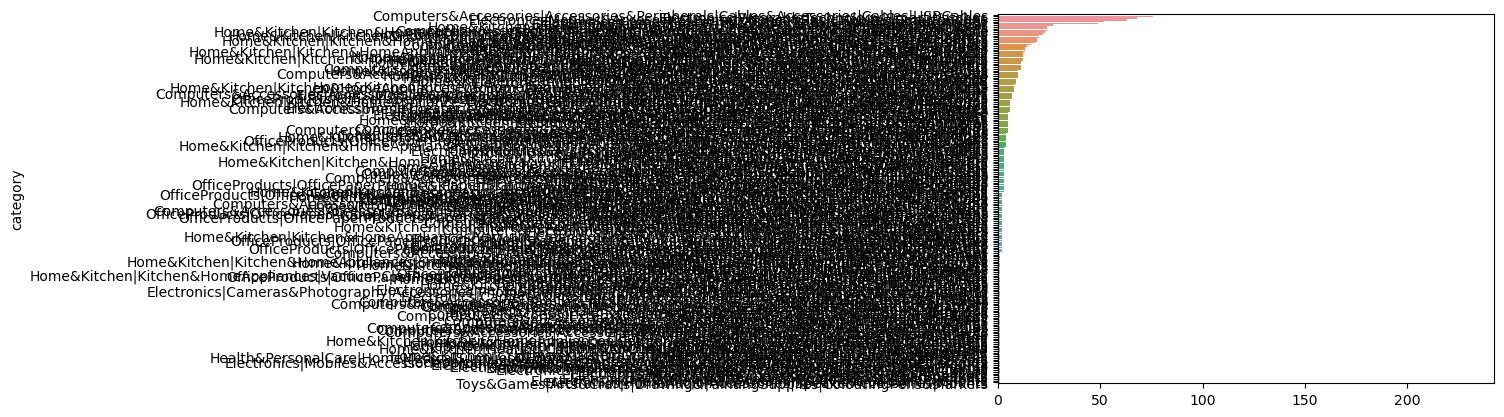

In [45]:
data = df.groupby("category")["rating_count"].count().sort_values(ascending= False)

sns.barplot(y=data.index, x= data.values)

Text(0.5, 1.0, 'Percentage of Products from Different\xa0Categories')

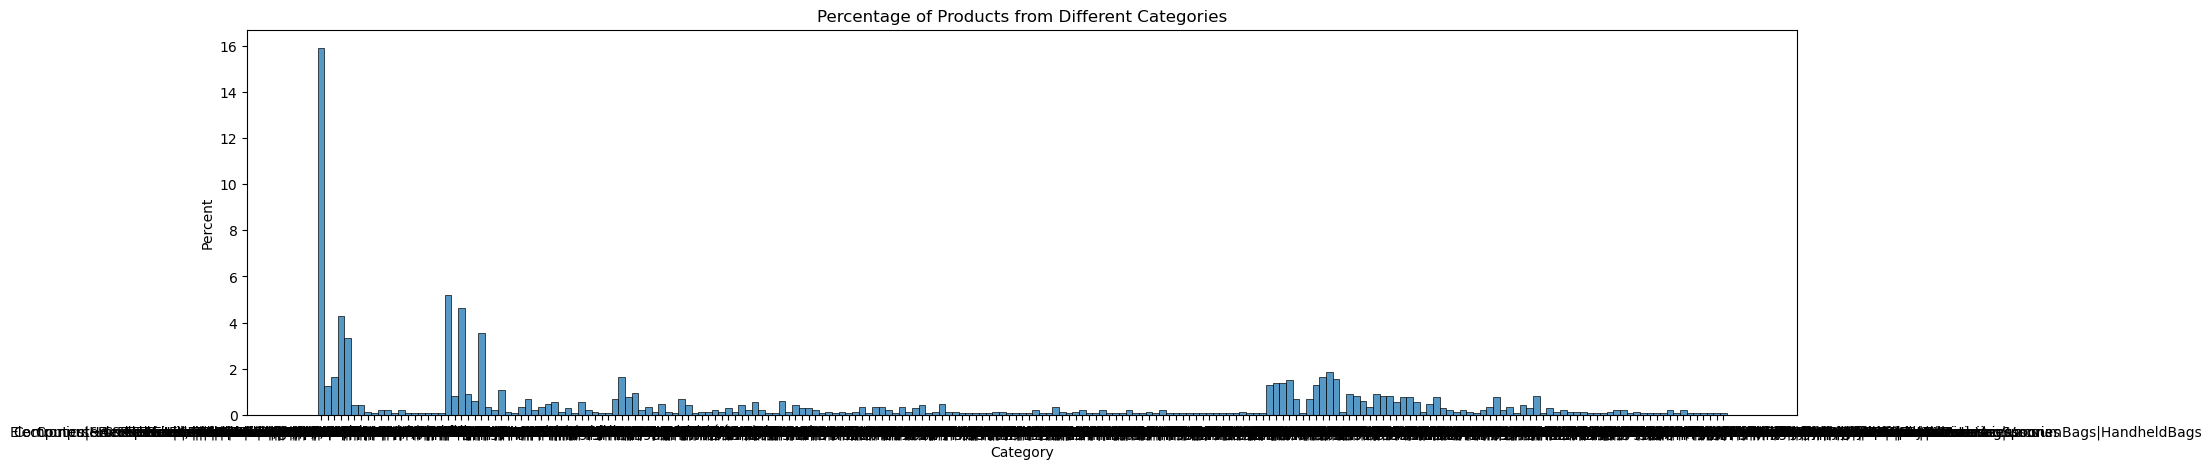

In [49]:
plt.figure(figsize=(20,5))

sns.histplot(data=df, x='category', stat='percent')
plt.xlabel('Category')
plt.ylabel('Percent')
plt.title('Percentage of Products from Different Categories')